In [1]:
# Imports necessários
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# Adicionar o diretório do projeto ao sys.path
notebook_dir = os.getcwd()  # Diretório atual do notebook
project_dir = os.path.dirname(notebook_dir)  # Diretório pai
sys.path.append(project_dir)  # Adicionar o diretório pai ao sys.path

# Imports das classes
from Classes.dados.Data import DataHandler, DataHandlerMLP
from Classes.modelos.single_neuron.adaline import NeuronADALINE
from Classes.modelos.single_neuron.perceptron import NeuronPeceptron
from Classes.rounds import RoundAll
from Classes.modelos.mlp.newtwork import NetWork
from Classes.rounds import RoundsADALINE, RoundsMLP, RoundsPerceptron
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

current_directory = os.path.dirname(os.getcwd())
# Adiciona o caminho relativo para o arquivo 'spiral.csv'
path = os.path.join(current_directory, "dados", "spiral.csv")
print(path)


c:\Users\henri\OneDrive\Área de Trabalho\ia_av3\dados\spiral.csv


## Dados de espiral.csv

In [2]:
dh = DataHandler(path)
componentes, rotulos = DataHandler.SepXY(dh)

data_1 = componentes[rotulos == 1, :]
data_2 = componentes[rotulos == -1, :]

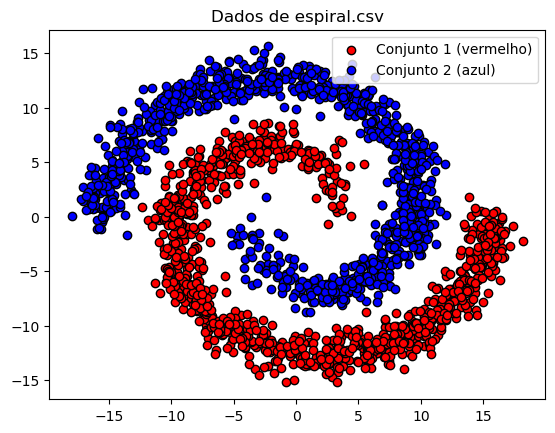

In [3]:
plt.scatter(data_1[:, 0], data_1[:, 1], color="r", edgecolors="k", label="Conjunto 1 (vermelho)")
plt.scatter(data_2[:, 0], data_2[:, 1], color="blue", edgecolors="k", label="Conjunto 2 (azul)")

# Adicionando título e legendas
plt.title("Dados de espiral.csv")
plt.legend()

# Exibindo o gráfico
plt.show()

## Perceptron

In [16]:
# Fazer as 500 rodas de treino do perceptron e coletar as amostras

# dfinir DataHandler
dh = DataHandler(path)
dh.Normalize()
# criar lista de perceptrons para serem treinados
# deve passar p (componentes) e n (passo de treiamento)
n = 0.1
list_perceptrons = [NeuronPeceptron(dh.colls - 1, n) for _ in range(500)]

# Definir classe responsável por realizar os treinos
rounds_per = RoundsPerceptron(dh)

In [17]:
resultados_perceptron = rounds_per.run_rounds(list_perceptrons)

### Metricas

In [18]:
# metricas
acuracia_pr = [accuracy_score(resultados_perceptron[i][0], resultados_perceptron[i][1]) for i in range(len(resultados_perceptron))]
sensibilidade_pr = [recall_score(resultados_perceptron[i][0], resultados_perceptron[i][1]) for i in range(len(resultados_perceptron))]
especificidade_pr = []
for y_true, y_pred in resultados_perceptron:
    # Obter matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Calcular especificidade
    especificidade_pr.append(tn / (tn + fp))

In [19]:
media_acuracia_pr = np.mean(acuracia_pr)
desvio_acuracia_pr = np.std(acuracia_pr)
min_acuracia_pr = np.min(acuracia_pr)
max_acuracia_pr = np.max(acuracia_pr)

media_sensibilidade_pr = np.mean(sensibilidade_pr)
desvio_sensibilidade_pr = np.std(sensibilidade_pr)
min_sensibilidade_pr = np.min(sensibilidade_pr)
max_sensibilidade_pr = np.max(sensibilidade_pr)

media_especificidade_pr = np.mean(especificidade_pr)
desvio_especificidade_pr = np.std(especificidade_pr)
min_especificidade_pr = np.min(especificidade_pr)
max_especificidade_pr = np.max(especificidade_pr)

# Exibindo as estatísticas
print(f"**Acurácia**")
print(f"Média: {media_acuracia_pr:.4f}, Desvio Padrão: {desvio_acuracia_pr:.4f}, Mínimo: {min_acuracia_pr:.4f}, Máximo: {max_acuracia_pr:.4f}")
print(f"**Sensibilidade**")
print(f"Média: {media_sensibilidade_pr:.4f}, Desvio Padrão: {desvio_sensibilidade_pr:.4f}, Mínimo: {min_sensibilidade_pr:.4f}, Máximo: {max_sensibilidade_pr:.4f}")
print(f"**Especificidade**")
print(f"Média: {media_especificidade_pr:.4f}, Desvio Padrão: {desvio_especificidade_pr:.4f}, Mínimo: {min_especificidade_pr:.4f}, Máximo: {max_especificidade_pr:.4f}")

**Acurácia**
Média: 0.5998, Desvio Padrão: 0.0811, Mínimo: 0.2900, Máximo: 0.7625
**Sensibilidade**
Média: 0.6124, Desvio Padrão: 0.2599, Mínimo: 0.0000, Máximo: 1.0000
**Especificidade**
Média: 0.5889, Desvio Padrão: 0.2686, Mínimo: 0.0000, Máximo: 1.0000


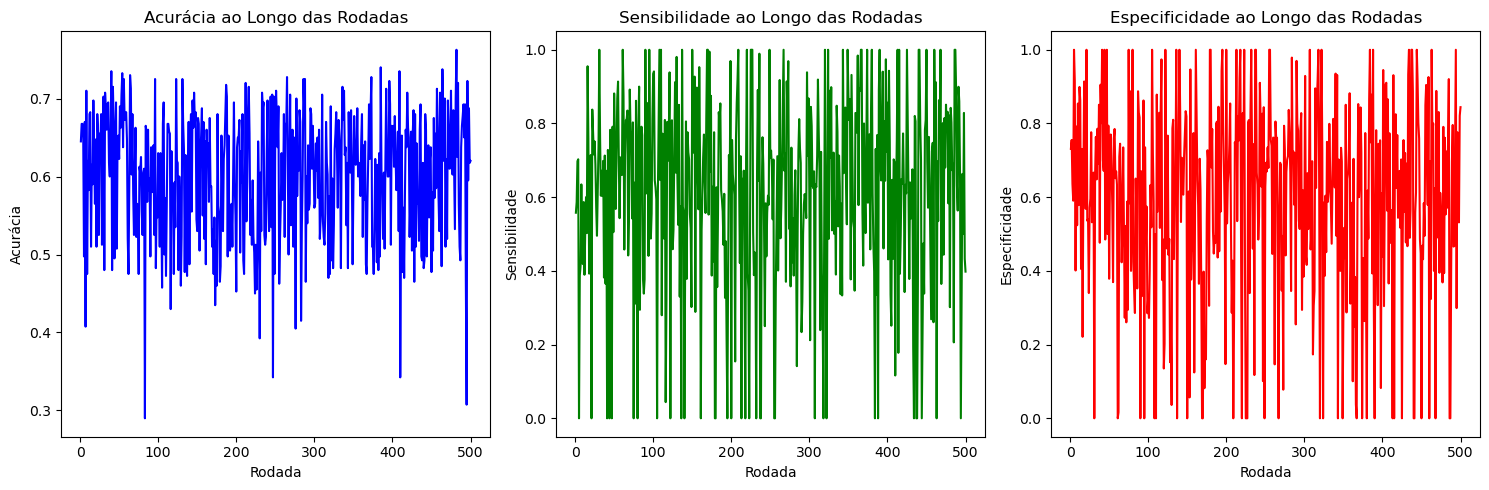

In [20]:
dados_pr = pd.DataFrame({
    'Rodada': range(1, len(acuracia_pr) + 1),
    'Acurácia': acuracia_pr,
    'Sensibilidade': sensibilidade_pr,
    'Especificidade': especificidade_pr
})

# Gráficos para Acurácia, Sensibilidade e Especificidade
plt.figure(figsize=(15, 5))

# Acurácia
plt.subplot(1, 3, 1)
sns.lineplot(data=dados_pr, x='Rodada', y='Acurácia', color='blue')
plt.title('Acurácia ao Longo das Rodadas')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')

# Sensibilidade
plt.subplot(1, 3, 2)
sns.lineplot(data=dados_pr, x='Rodada', y='Sensibilidade', color='green')
plt.title('Sensibilidade ao Longo das Rodadas')
plt.xlabel('Rodada')
plt.ylabel('Sensibilidade')

# Especificidade
plt.subplot(1, 3, 3)
sns.lineplot(data=dados_pr, x='Rodada', y='Especificidade', color='red')
plt.title('Especificidade ao Longo das Rodadas')
plt.xlabel('Rodada')
plt.ylabel('Especificidade')

plt.tight_layout()
plt.show()

## ADALINE

In [4]:
# Fazer as 500 rodas de treino do ADALINE e coletar as amostras

# dfinir DataHandler
dh = DataHandler(path)
# criar lista de perceptrons para serem treinados
# deve passar p (componentes) , n (passo de treiamento) e pr (erro de convergencia)
n = 0.01
pr = 0.0001
list_ada = [NeuronADALINE(dh.colls - 1, n, pr) for _ in range(500)]

# Definir classe responsável por realizar os treinos
rounds_ada = RoundsADALINE(dh)

In [5]:
resultados_adaline = rounds_ada.run_rounds(list_ada)

### Metricas

In [10]:
# metricas
acuracia = [accuracy_score(resultados_adaline[i][0], resultados_adaline[i][1]) for i in range(len(resultados_adaline))]
sensibilidade = [recall_score(resultados_adaline[i][0], resultados_adaline[i][1]) for i in range(len(resultados_adaline))]
especificidade = []
for y_true, y_pred in resultados_adaline:
    # Obter matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Calcular especificidade
    especificidade.append(tn / (tn + fp))

In [11]:
media_acuracia = np.mean(acuracia)
desvio_acuracia = np.std(acuracia)
min_acuracia = np.min(acuracia)
max_acuracia = np.max(acuracia)

media_sensibilidade = np.mean(sensibilidade)
desvio_sensibilidade = np.std(sensibilidade)
min_sensibilidade = np.min(sensibilidade)
max_sensibilidade = np.max(sensibilidade)

media_especificidade = np.mean(especificidade)
desvio_especificidade = np.std(especificidade)
min_especificidade = np.min(especificidade)
max_especificidade = np.max(especificidade)

# Exibindo as estatísticas
print(f"**Acurácia**")
print(f"Média: {media_acuracia:.4f}, Desvio Padrão: {desvio_acuracia:.4f}, Mínimo: {min_acuracia:.4f}, Máximo: {max_acuracia:.4f}")
print(f"**Sensibilidade**")
print(f"Média: {media_sensibilidade:.4f}, Desvio Padrão: {desvio_sensibilidade:.4f}, Mínimo: {min_sensibilidade:.4f}, Máximo: {max_sensibilidade:.4f}")
print(f"**Especificidade**")
print(f"Média: {media_especificidade:.4f}, Desvio Padrão: {desvio_especificidade:.4f}, Mínimo: {min_especificidade:.4f}, Máximo: {max_especificidade:.4f}")


**Acurácia**
Média: 0.5614, Desvio Padrão: 0.1157, Mínimo: 0.2300, Máximo: 0.7475
**Sensibilidade**
Média: 0.5642, Desvio Padrão: 0.1263, Mínimo: 0.0100, Máximo: 0.8165
**Especificidade**
Média: 0.5584, Desvio Padrão: 0.1215, Mínimo: 0.1390, Máximo: 0.7910


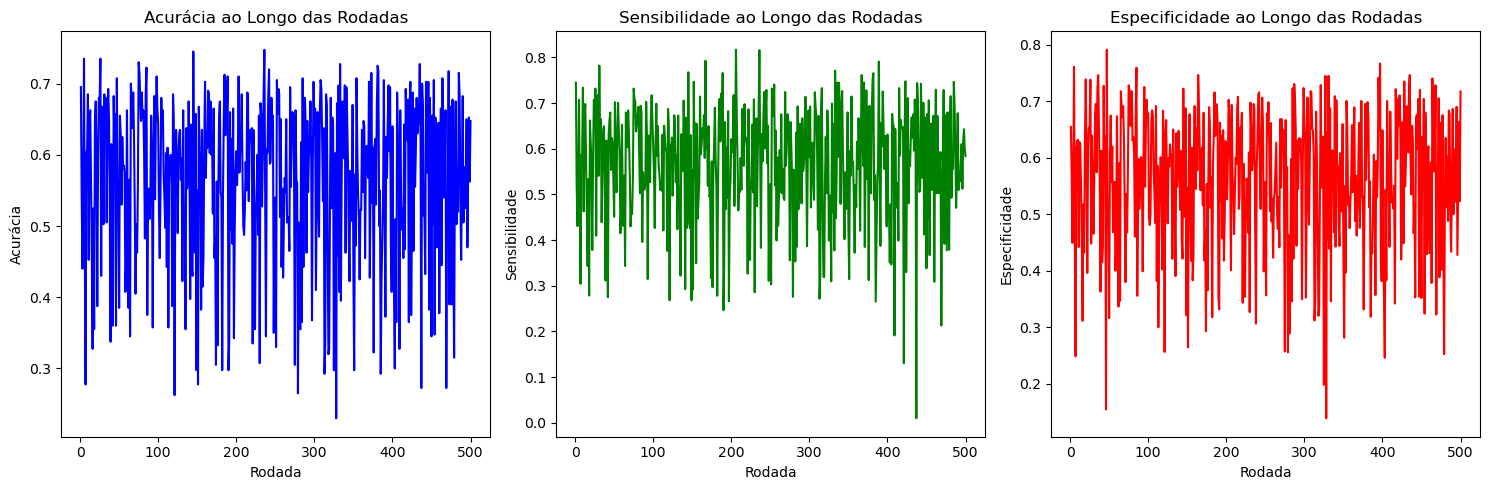

In [14]:
dados = pd.DataFrame({
    'Rodada': range(1, len(acuracia) + 1),
    'Acurácia': acuracia,
    'Sensibilidade': sensibilidade,
    'Especificidade': especificidade
})

# Gráficos para Acurácia, Sensibilidade e Especificidade
plt.figure(figsize=(15, 5))

# Acurácia
plt.subplot(1, 3, 1)
sns.lineplot(data=dados, x='Rodada', y='Acurácia', color='blue')
plt.title('Acurácia ao Longo das Rodadas')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')

# Sensibilidade
plt.subplot(1, 3, 2)
sns.lineplot(data=dados, x='Rodada', y='Sensibilidade', color='green')
plt.title('Sensibilidade ao Longo das Rodadas')
plt.xlabel('Rodada')
plt.ylabel('Sensibilidade')

# Especificidade
plt.subplot(1, 3, 3)
sns.lineplot(data=dados, x='Rodada', y='Especificidade', color='red')
plt.title('Especificidade ao Longo das Rodadas')
plt.xlabel('Rodada')
plt.ylabel('Especificidade')

plt.tight_layout()
plt.show()

## MLP

In [10]:
dh = DataHandlerMLP(path)
train, teste = dh.MonteCarlo()
train_x, train_y = DataHandlerMLP.SepXY(train)
teste_x, teste_y = DataHandlerMLP.SepXY(teste)

In [12]:
rede = NetWork(2,[100],1, learningRate=1e-1)
rede.train(train_x, train_y)

In [13]:
dif = teste_y - rede.predic(teste_x)
print(len(dif[dif==0])/len(dif))

0.9925


In [17]:
# Fazer as 500 rodadas de teste do mlp
dh = DataHandlerMLP(path)
list_mlp = [NetWork(2, [100],1) for _ in range(500)]


## 500 rodadas de todos os modelos

In [9]:
import json
dados = DataHandlerMLP(path)

rodadas = 500

listPerceptron = [NeuronPeceptron(2, 0.01) for _ in range(rodadas)]
listAdaline = [NeuronADALINE(2) for _ in range(rodadas)]
listMLP = [NetWork(2, [100], 1) for _ in range(rodadas)]

rounds = RoundAll(dados)
rounds.run_rounds(listPerceptron, listAdaline, listMLP)
print(rounds.record)

with open("meu_arquivo.json", "w", encoding="utf-8") as arquivo:
    json.dump(rounds.record, arquivo, ensure_ascii=False, indent=4)

{'y': [[1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0,

In [14]:
with open("meu_arquivo.json","r") as json_file:
    data_rounds: dict = json.load(json_file)
print(data_rounds.keys())
for key in data_rounds:
    print(len(data_rounds[key])) 

dict_keys(['y', 'mlp', 'perceptron', 'adaline'])
500
500
500
500


In [ ]:
# calcular acuradia, sensibilidade e especifidade
acuracia_pr = [accuracy_score(rotulo, predict) for rotulo, predict in zip(data_rounds["y"], data_rounds["perceptron"])]
sensibilidade_pr = [recall_score(rotulo, predict) for rotulo, predict in zip(data_rounds["y"], data_rounds["perceptron"])]
especificidade_pr = []
for rotulo, predict in zip(data_rounds["y"], data_rounds["perceptron"]):
    # Obter matriz de confusão
    tn, fp, fn, tp = confusion_matrix(rotulo, predict).ravel()
    especificidade_pr.append(tn / (tn + fp))